# 탐색적 데이터 분석
> EDA (Exploratory Data Analysis)

크게 요약/시각화로 나뉜다. 수리적 분석인 머신러닝과 다르게 컴퓨터가 필요한 계산은 없지만, 1차적으로 데이터의 출처와 주제에 대해 이해하고 구성 요소인 피처를 살펴본다. 피처의 속성을 탐색함으로써 머신러닝에 사용할 변수의 인사이트를 얻을 수 있다

> anaconda 환경 실행후 사용잊지말자..! (내 맥은 소중하니까) 환경이름은 'dacon'

# 패키지 설치

In [ ]:
# pandas
!pip install pandas
# numpy
!pip install numpy
# seaborn
!pip install seaborn
# scikit-learn
!pip install scikit-learn
# geopy
!pip install geopy
# XGBoost
!pip install xgboost
# lightGBM
!pip install lightgbm

# 데이터 불러오기

In [61]:
# 작업 경로 설정
import os
os.chdir(r"/Users/hmp/local/repos/dacon/퇴근시간버스승차인원예측")

In [62]:
import pandas as pd

train = pd.read_csv('secu_data/train.csv')
test = pd.read_csv('secu_data/test.csv')
bts= pd.read_csv('secu_data/bus_bts.csv')
jeju_life = pd.read_csv('secu_data/jeju_financial_life_data.csv')
weather = pd.read_csv('weather.csv', encoding='cp949')
rain = pd.read_csv('rain.csv', encoding='utf-8')

# EDA - Summary

# train.csv 살펴보기

In [63]:
# 상위 5개의 행을 살펴보자
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
# 각 컬럼의 변수명과 데이터타입을 확인하자
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

# test.csv 살펴보기

In [65]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             228170 non-null  int64  
 1   date           228170 non-null  object 
 2   bus_route_id   228170 non-null  int64  
 3   in_out         228170 non-null  object 
 4   station_code   228170 non-null  int64  
 5   station_name   228170 non-null  object 
 6   latitude       228170 non-null  float64
 7   longitude      228170 non-null  float64
 8   6~7_ride       228170 non-null  float64
 9   7~8_ride       228170 non-null  float64
 10  8~9_ride       228170 non-null  float64
 11  9~10_ride      228170 non-null  float64
 12  10~11_ride     228170 non-null  float64
 13  11~12_ride     228170 non-null  float64
 14  6~7_takeoff    228170 non-null  float64
 15  7~8_takeoff    228170 non-null  float64
 16  8~9_takeoff    228170 non-null  float64
 17  9~10_takeoff   228170 non-nul

> train 에는 출근시간은 승차, 하차 모두 있지만, 퇴근시간은 승차 인원만 있다, (결측치 없음!)

> test 에는 출근시간의 승차, 하차 만 있다. (마찬가지로 결측치 없음)

# bus_bts.csv 살펴보기

In [67]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [68]:
bts.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


> 결측치 존재, 하차할 때 카드를 찍지 않으면 getoff_* 열이 NULL

In [69]:
# card 데이터의 시간 범위가 오전만 있으니,
#train 의 승차정보만 있는지, test 의 정보도 포함인지 알아보자
card_cnt = bts['user_count'].sum()

train_cnt = 0
train_cnt += train['6~7_ride'].sum()
train_cnt += train['7~8_ride'].sum()
train_cnt += train['8~9_ride'].sum()
train_cnt += train['9~10_ride'].sum()
train_cnt += train['10~11_ride'].sum()
train_cnt += train['11~12_ride'].sum()

test_cnt = 0
test_cnt += test['6~7_ride'].sum()
test_cnt += test['7~8_ride'].sum()
test_cnt += test['8~9_ride'].sum()
test_cnt += test['9~10_ride'].sum()
test_cnt += test['10~11_ride'].sum()
test_cnt += test['11~12_ride'].sum()

if train_cnt + test_cnt == card_cnt:
    print('결과: 카드정보에 test 승차 데이터 포함')
elif train_cnt == card_cnt:
    print('결과: 카드정보에 train 데이터만 있음')

결과: 카드정보에 test 승차 데이터 포함


> test 데이터의 승차 정보를 bts 데이터를 통해 알 수 있겠다 ! bus_route_id 컬럼이 동일하니 추후 이를 기준으로 병합해 쓰자

# jeju_financial_life_data.csv 살펴보기
> latitude, longitude 변수를 기준으로 제주도 지역민의 금융 생활 통계 데이터를 불러오자
> 데이콘 [KCB 금융스타일 시각화 경진대회](https://dacon.io/competitions/official/82407/data/) 에서 받을 수 있다.

In [70]:
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [71]:
jeju_life.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

> 변수를 살펴보고 관련있는 변수만 나중에 전처리해서 가져오자

# weather.csv 살펴보기
> 9월의 오전 10시의 기상정보

In [72]:
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [73]:
weather.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      46 non-null     object 
 1   현재일기    46 non-null     object 
 2   현재기온    46 non-null     float64
 3   체감온도    46 non-null     float64
 4   일강수     46 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


> 날짜 변수 기준으로 추후 train, test 에 병합하자

# rain.csv 살펴보기

In [74]:
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


In [75]:
rain.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       184 non-null    object 
 1   일시       184 non-null    object 
 2   기온(°C)   184 non-null    float64
 3   강수량(mm)  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


> 지점 변수에 대하여 test data 의 지점별 기상정보에 추가하자 !

# EDA - Visualize

In [76]:
# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 쥬피터노트에서 결과를 출력하도록 설정
%matplotlib inline

# 시각화 한글 폰트 설정
import platform
# 윈도우 사용자
if platform.system() == 'Windows':
    print('This is a Windows')
    plt.rc('font', family='Malgun Gothic')

# Mac 사용자
elif platform.system() == 'Darwin':
    print('This is a Mac')
    plt.rc('font', family='AppleGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore') 

This is a Mac


# 우선 train 의 퇴근인원 (종속변수) 을 살펴보자
> 가장 중요한 변수인 만큼 분포는 어떠한지, 치우침은 없는지 살펴보자, 초기에 중요한 변수를 발견한다면, 이와 관련된 여러 파생변수를 만드는 것이 추후 성능향상에 좋다

In [77]:
# 학습 데이터 복사본 생성
traindata = train.copy()

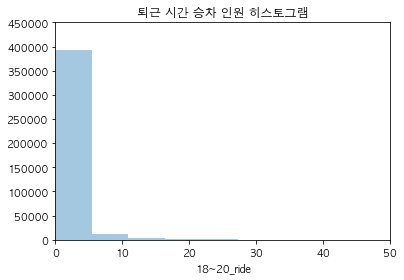

In [78]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 시각화
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50)
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("퇴근 시간 승차 인원 히스토그램") # 그래프 제목 지정
plt.show() # 그래프 그리기

In [79]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 확인
traindata.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

# 탐색적 분석에서 가능한 단일 변수에 따른 종속변수값을 보자

# 요일별 종속변수

In [86]:
# 요일 변수 생성

# pd.to_datetime() 함수로 str 을 날짜형으로 변환
traindata['date'] = pd.to_datetime(traindata['date'])

# datetime 객체에서 요일을 문자형으로 추출해 변수 생성
traindata['weekday'] = traindata['date'].dt.strftime('%a')

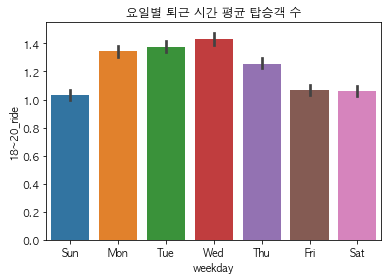

In [87]:
# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.title("요일별 퇴근 시간 평균 탑승객 수")
plt.show()

# 시외/시내 별 종속변수

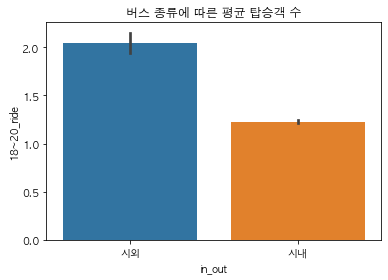

In [88]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.title("버스 종류에 따른 평균 탑승객 수")
plt.show()

# 일별 종속변수

In [89]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum'
                                                                    ).reset_index()
# 상위 5개 행 확인
eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


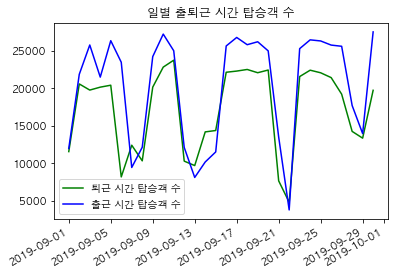

In [90]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.title("일별 출퇴근 시간 탑승객 수")   
plt.show()

# EDA Summary

**train/test**
- train 에는 출근시간은 승차, 하차 모두 있지만, 퇴근시간은 승차 인원만 있다, (결측치 없음!)
- test 에는 출근시간의 승차, 하차 만 있다. (마찬가지로 결측치 없음)

**bts**
- 하차할 때 카드를 찍지 않은 것에 대한 결측치 존재
- bts 는 train/test 데이터의 승차 정보를 갖고 있다.

**jeju_life**
- 관련있는 변수만으로 전처리 해서 병합하자

**weather**
- 오전 10시의 기상정보만 갖고있다.
- 날짜변수를 기준으로 train/test 에 병합하자

**rain**
- 지점 변수에 대해 test data 지점별 기상정보에 추가하자



# EDA Visualize

- 대부분의 퇴근시간 승차인원은 0~5 명 구간
- 수요일까지 점차 증가하다가 감소
- 시외가 약 2배 많음
- 출근의 탑승객과 거의 유사